In [2]:
import lifelines
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
plt.style.available
plt.style.use("bmh")

In [4]:
cns_all = pd.read_csv("survival.csv")

In [5]:
del cns_all["Unnamed: 0"]

In [6]:
C = cns_all["Status (Dead or alive)"].apply(lambda x : True if x == "DEAD" else False)

In [7]:
T = cns_all["Duration from diagnosis to death or last follow up"]

In [8]:
kmf = KaplanMeierFitter()

In [9]:
kmf.fit(T, event_observed=C )

<lifelines.KaplanMeierFitter: fitted with 259 observations, 198 censored>

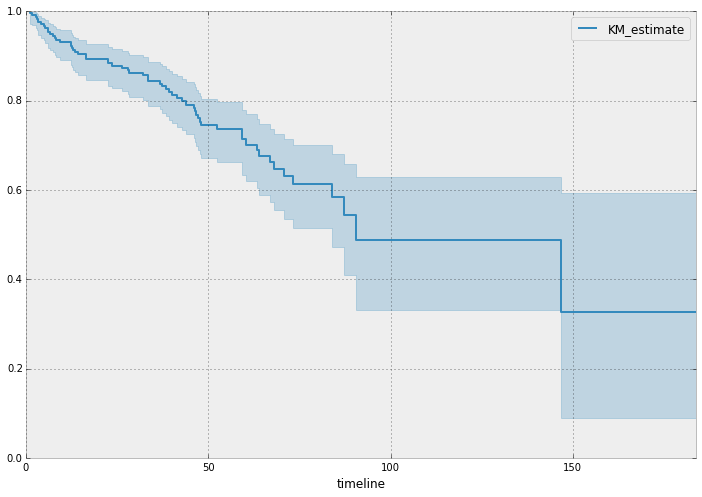

In [10]:
kmf.plot(figsize=(12, 8))

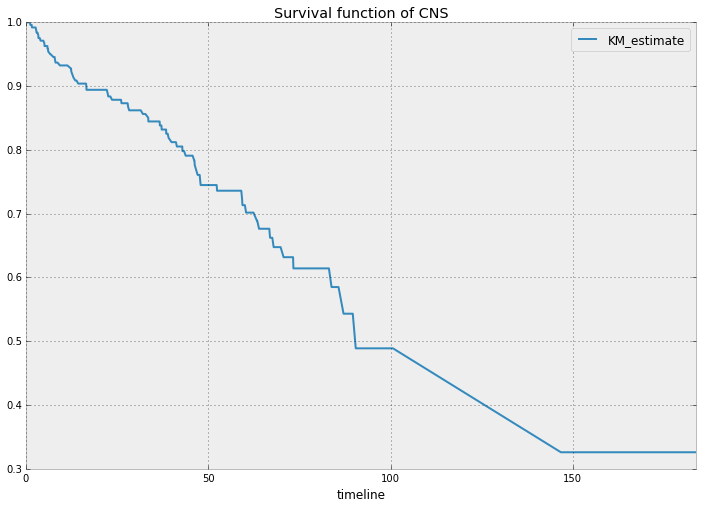

In [11]:
kmf.survival_function_.plot(figsize=(12, 8))
plt.title('Survival function of CNS');

In [12]:
cns_all["Age"] = cns_all["Age"].apply(lambda x : 1 if x > 60 else 0)
cns_all["Race"] = cns_all["Race"].apply(lambda x : "White" if x == "White" else "Other")

def stage_mask(stage):
    if stage == "I" or stage == "II":
        return "I/II"
    elif stage == "III" or stage == "IV":
        return "III/IV"
    else:
        return "Missing"
    
def LDH_mask(ldh):
    if ldh == "NO":
        return 0
    elif ldh == "YES":
        return 1
    else:
        return None
    
cns_all["Stage"] = cns_all["Stage"].apply(stage_mask)
cns_all["IPI Score"] = cns_all["IPI Score"].apply(lambda x: "L/LI" if x < 3 else "H/HI")
cns_all["PS"] = cns_all["PS"].apply(lambda x: 1 if x > 1 else 0)

In [13]:
cns_all["LDH"] = cns_all["LDH"].apply(LDH_mask)
cns_all["B Symp 1"] = cns_all["B Symp 1"].apply(lambda x : 0 if x == "NO" else 1)
cns_all["B symp 2"] = cns_all["B symp 2"].apply(lambda x : 0 if x == "NO" else 1)
cns_all["B symp 3"] = cns_all["B symp 3"].apply(lambda x : 0 if x == "NO" else 1)

In [14]:
b_symp_any = cns_all["B Symp 1"] + cns_all["B symp 2"] + cns_all["B symp 3"]
cns_all["B Symp"] = b_symp_any.apply(lambda x: 1 if x > 0 else 0)

In [15]:
del cns_all["B Symp 1"]
del cns_all["B symp 2"]
del cns_all["B symp 3"]

In [16]:
cns_all[">1 extranodal"] = cns_all[">1 extranodal"].apply(lambda x : 0 if x == "NO" else 1)
cns_all["BM Involv"] = cns_all["BM Involv"].apply(LDH_mask)
cns_all["PB Involv"] = cns_all["PB Involv"].apply(LDH_mask)
cns = cns_all["CNS "].apply(LDH_mask)
cns_all["cns"] = cns
del cns_all["CNS "]
cns_all["cns"] = cns_all["cns"].apply(lambda x: 1 if x == 1 else 0)
cns_all

,Age,Gender,Race,Stage,IPI Score,PS,LDH,>1 extranodal,BM Involv,PB Involv,Status (Dead or alive),Date of death or last follow up,Duration from diagnosis to death or last follow up,Date of diagnosis,B Symp,cns
0,1,M,White,III/IV,L/LI,0,NaN,0,1,NaN,UNKNOWN,1/23/2013,11.18,2/18/2012,0,0
1,0,F,White,III/IV,H/HI,1,0,1,0,NaN,ALIVE,3/31/2014,17.62,10/11/2012,1,0
2,0,M,White,I/II,L/LI,0,0,0,0,0,ALIVE,5/22/2014,183.60,2/5/1999,0,0
3,0,F,Other,Missing,L/LI,0,1,0,1,1,ALIVE,4/28/2014,60.03,4/28/2009,0,0
4,0,M,White,III/IV,H/HI,1,1,0,1,0,UNKNOWN,5/3/2013,82.84,6/9/2006,1,0
5,0,M,Other,III/IV,H/HI,0,1,1,1,NaN,UNKNOWN,10/3/2011,2.66,7/14/2011,1,0
6,0,M,Other,III/IV,L/LI,0,NaN,1,0,NaN,ALIVE,4/25/2014,11.08,5/23/2013,1,0
7,1,M,White,III/IV,L/LI,0,NaN,0,0,NaN,DEAD,3/27/2014,26.20,1/20/2012,1,0
8,1,F,White,III/IV,L/LI,0,NaN,0,1,1,ALIVE,1/16/2014,41.12,8/14/2010,1,0
9,1,M,Other,I/II,L/LI,0,0,0,NaN,1,UNKNOWN,10/26/2009,2.43,8/13/2009,0,0


In [17]:
cns_all["Observed"] = C
cns_all["Duration"] = T
del cns_all["Status (Dead or alive)"]
del cns_all["Duration from diagnosis to death or last follow up"]

59.37
146.68


NameError: name 'font' is not defined

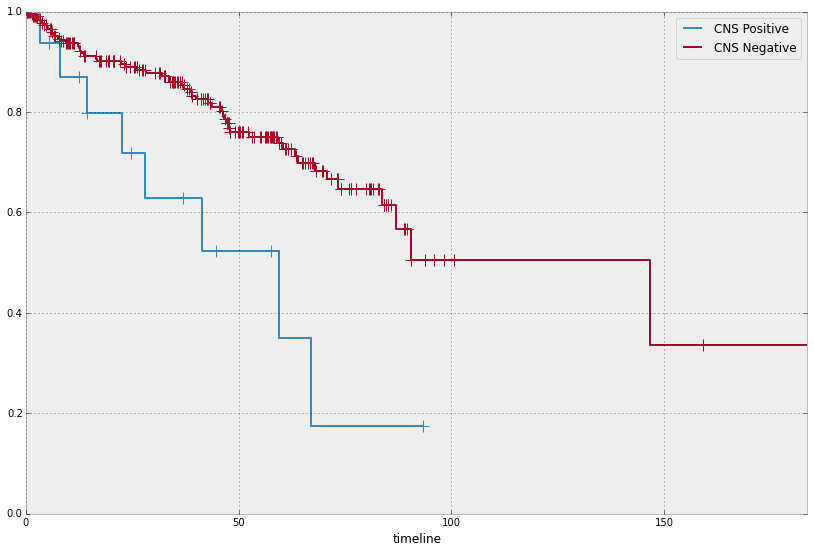

In [18]:
ax = plt.subplot(111)
cns_pos = (cns_all["cns"] == 1)
kmf.fit(T[cns_pos], event_observed=C[cns_pos], label="CNS Positive")
kmf.plot(ax=ax, figsize=(14, 9), flat=False, show_censors=True, ci_show=False)
print(kmf.median_)

kmf.fit(T[~cns_pos], event_observed=C[~cns_pos], label="CNS Negative")
kmf.plot(ax=ax, figsize=(14, 9), show_censors=True, ci_show=False)
print(kmf.median_)

plt.ylim(0,1);

plt.xlabel("Time (months)", **font)
plt.ylabel("Overall survival probability", **font)

In [19]:
kmf.fit(T[cns_pos], event_observed=C[cns_pos], label="CNS Positive").median_

59.369999999999997

In [20]:
from lifelines.statistics import logrank_test

logrank_test(T[cns_pos], T[~cns_pos], C[cns_pos], C[~cns_pos], alpha=.99 )

<lifelines.StatisticalResult: 
Results
   t 0: -1
   alpha: 0.99
   df: 1
   null distribution: chi squared
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00522 |              7.803 |      Reject Null    |        True       
>

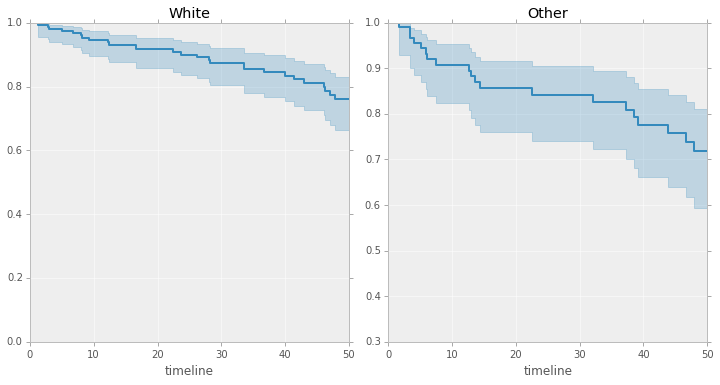

In [41]:
categories = cns_all['Race'].unique()

for i,category in enumerate(categories):
    ax = plt.subplot(2,3,i+1)
    ix = cns_all['Race'] == category
    kmf.fit( T[ix], C[ix], label=category )
    kmf.plot(ax=ax, legend=False, figsize=(15, 10))
    plt.title(category)
    plt.xlim(0,50)
plt.tight_layout()

In [63]:
def PB_mask(pb):
    if pb == 0:
        return "No"
    elif pb == 1:
        return "Yes"
    else:
        return "Missing"

In [65]:
cns_all["PB Involv"] = cns_all["PB Involv"].apply(PB_mask)

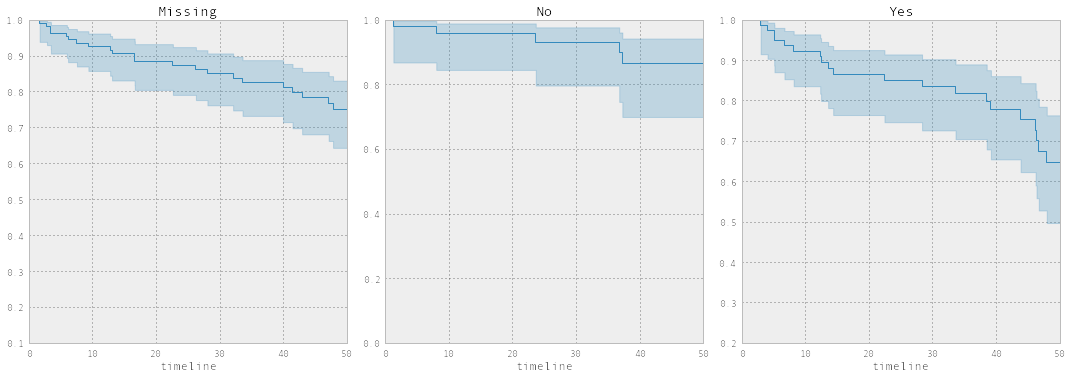

In [98]:
categories = cns_all['PB Involv'].unique()

for i,category in enumerate(categories):
    ax = plt.subplot(2,3,i+1)
    ix = cns_all['PB Involv'] == category
    kmf.fit( T[ix], C[ix], label=category )
    kmf.plot(ax=ax, legend=False, figsize=(15, 10))
    plt.title(category)
    plt.xlim(0,50)
plt.tight_layout()

In [125]:
cns_pos = cns_all[cns_all['cns'] == 1]
cns_pos = cns_pos.reset_index()

IndexingError: Unalignable boolean Series key provided

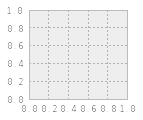

In [126]:
column = 'Gender'
categories = cns_pos[column].unique()

for i,category in enumerate(categories):
    ax = plt.subplot(2,3,i+1)
    ix = cns_pos[column] == category
    kmf.fit( T[ix], C[ix], label=category )
    kmf.plot(ax=ax, legend=False, figsize=(15, 10))
    plt.title(category)
    plt.xlim(0,50)
plt.tight_layout()

In [118]:
summary, p_value, test_results = logrank_test(T[cns_pos], T[~cns_pos], C[cns_pos], C[~cns_pos], alpha=.99 )
print summary

TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [128]:
cns_pos.describe()

,index,Age,PS,LDH,>1 extranodal,BM Involv,B Symp,cns,Observed,Duration
count,17.000000,17.000000,17,13.000000,17.000000,14.000000,17.000000,17,17,17.000000
mean,140.294118,0.352941,0,0.384615,0.294118,0.500000,0.411765,1,0.4705882,31.428824
std,70.354251,0.492592,0,0.506370,0.469668,0.518875,0.507300,0,0.5144958,26.081535
min,22.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,1,False,1.080000
25%,97.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,1,0,12.360000
50%,150.000000,0.000000,0,0.000000,0.000000,0.500000,0.000000,1,0,24.620000
75%,192.000000,1.000000,0,1.000000,1.000000,1.000000,1.000000,1,1,44.770000
max,255.000000,1.000000,0,1.000000,1.000000,1.000000,1.000000,1,True,93.330000
